<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Problem Statement:-

**The data file contains box office collection and social media promotion information about movies released between 2013-2015 period. We have to study the data and make meaningful inferences and plots.**


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Attribute Information:

| Column Name|Description|
|------------|-----------|
| SlNo.| Release Date|
| MovieName|  Name of the Movie
| ReleaseTime | Mentions special time of release. LW (Long Weekend), FS(Festive Season), HS(HolidaySeason),N(Normal).|
| Genre|Genre of the film, Romance, Thriller, Action, Comedy,Etc. |
| Budget|Movie Creation Budget|
| BoxOfficeCollection| Box Office Collection|
|Youtube Views|Number of Views of the Youtube trailers |
|Youtube Likes|Number of Likes of the Youtube trailers |
|Youtube Dislikes|Number of Dislikes of the Youtube trailers |

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">1.Let's start with understanding the data set

    - How many records are present in the dataset?
    - Check the info. Make inferences about the data types
    - Calculate the five point summary. Write your observation
    - Are there any missing values?
    - What all variables are skewed or outliers are present?
    - Tranform the YoutubeDislikes with Log, sqrt,cube and boxcox, visualize the difference
    - Creat dummies for Genre Variable
   
    

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df= pd.read_excel("bollywood.xlsx") # use read_excel

In [6]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [6]:
print("total number of rows: ", df.shape[0])
print("total number of cols: ", df.shape[1])

total number of rows:  149
total number of cols:  10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 11.8+ KB


In [ ]:
# no missing values
# there date time variable
# Three categorical variables
# there are 6 numerical variables 

In [11]:
#five point summary
round(df.describe().T,2) #.T is used to transpose

,count,mean,std,min,25%,50%,75%,max
SlNo,149.0,75.00,43.16,1.00,38.00,75.0,112.00,149.0
Budget,149.0,29.44,28.24,2.00,11.00,21.0,35.00,150.0
BoxOfficeCollection,149.0,55.67,94.49,0.01,8.78,28.0,57.45,735.0
YoutubeViews,149.0,3337919.91,3504406.99,4354.00,1076591.00,2375050.0,4550051.00,23171067.0
YoutubeLikes,149.0,7877.54,12748.05,1.00,1377.00,4111.0,9100.00,101275.0
YoutubeDislikes,149.0,1207.82,1852.69,1.00,189.00,614.0,1419.00,11888.0


In [ ]:
# Counts to number of filled rows
# 50% movies budget are less or equal to 21 crores, with the max budget ranging upto 150 cr.
# Max boxoffice collection done by a movie ranges upto 735 cr.
# The Minimum views for a movie is not less than 4400 views approx. or 4354 views precisely; with an average views rangning to 33L approx.
# The movies are having more Likes than Dislikes.

In [12]:
# skewness
df.skew()

C:\Users\ANUPAM~1\AppData\Local\Temp/ipykernel_13284/4086952035.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SlNo                   0.000000
Budget                 2.059560
BoxOfficeCollection    3.980880
YoutubeViews           2.667002
YoutubeLikes           4.391138
YoutubeDislikes        3.534963
dtype: float64

array([[<AxesSubplot:title={'center':'Budget'}>,
        <AxesSubplot:title={'center':'BoxOfficeCollection'}>],
       [<AxesSubplot:title={'center':'YoutubeViews'}>,
        <AxesSubplot:title={'center':'YoutubeLikes'}>],
       [<AxesSubplot:title={'center':'YoutubeDislikes'}>, <AxesSubplot:>]],
      dtype=object)

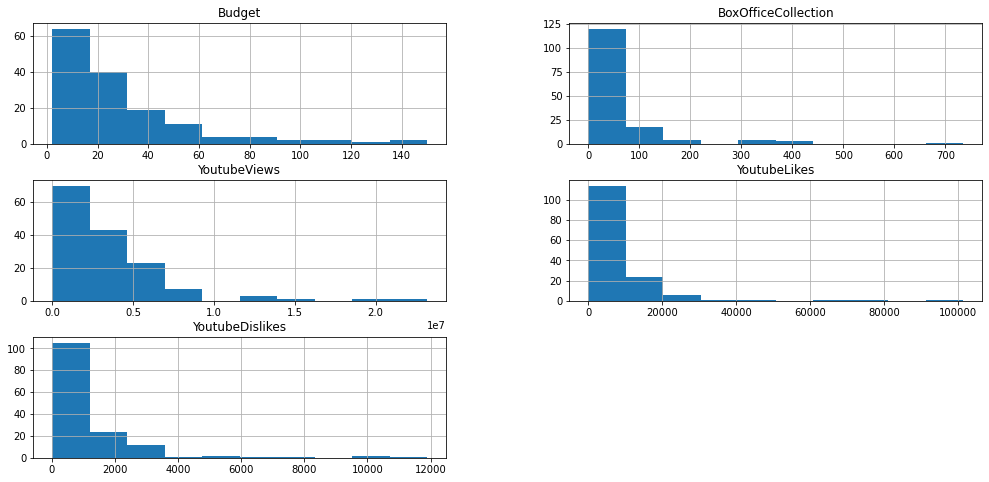

In [16]:
#hist
df.iloc[:,2:].hist()

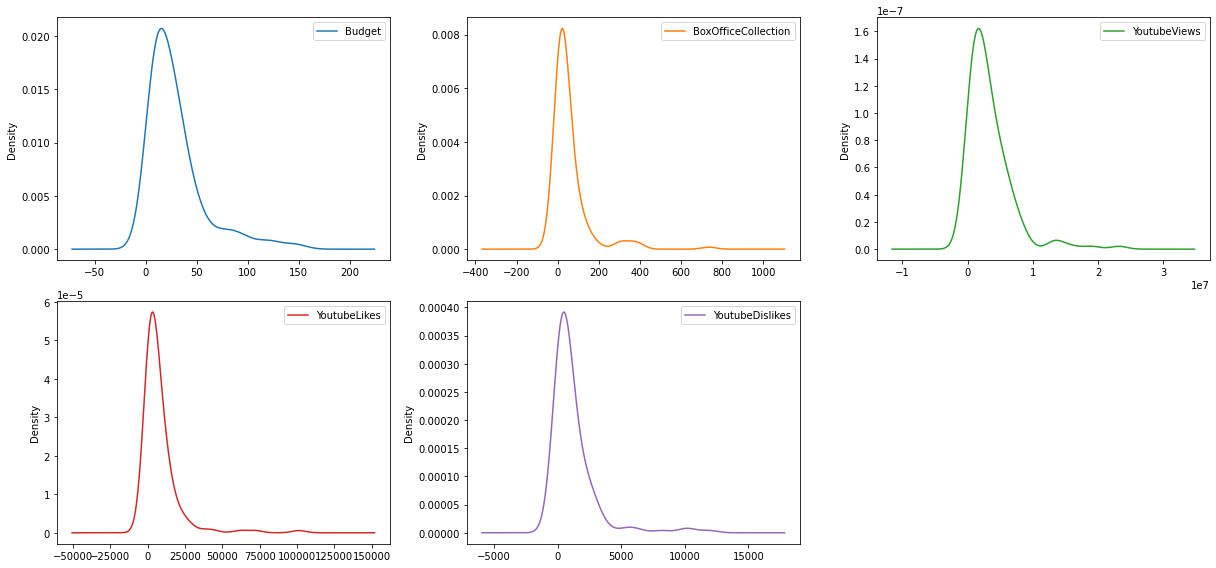

In [14]:
#density plots
plt.rcParams["figure.figsize"]=[17,8]
df.iloc[:,2:].plot(kind='density',subplots= True, layout=(2,3), sharex=False)
plt.tight_layout()
plt.show()

<AxesSubplot:>

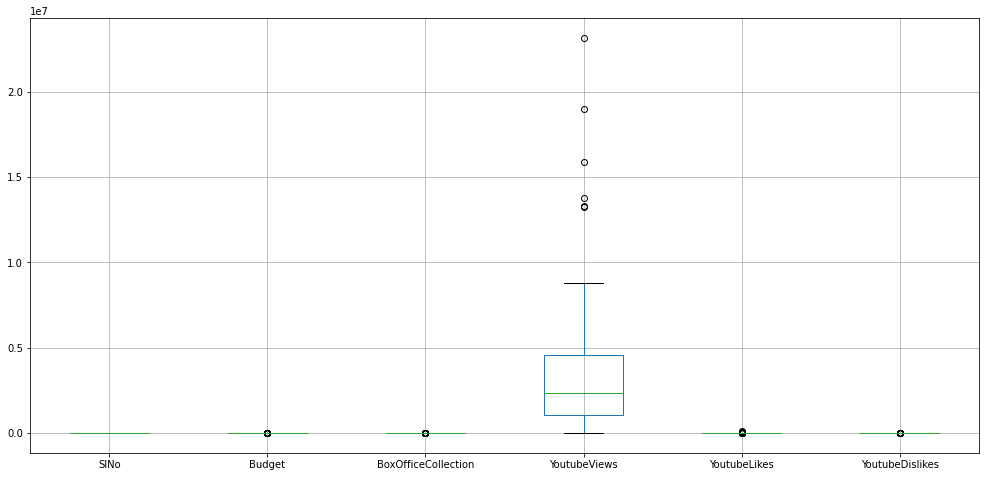

In [20]:
df.boxplot()

<AxesSubplot:>

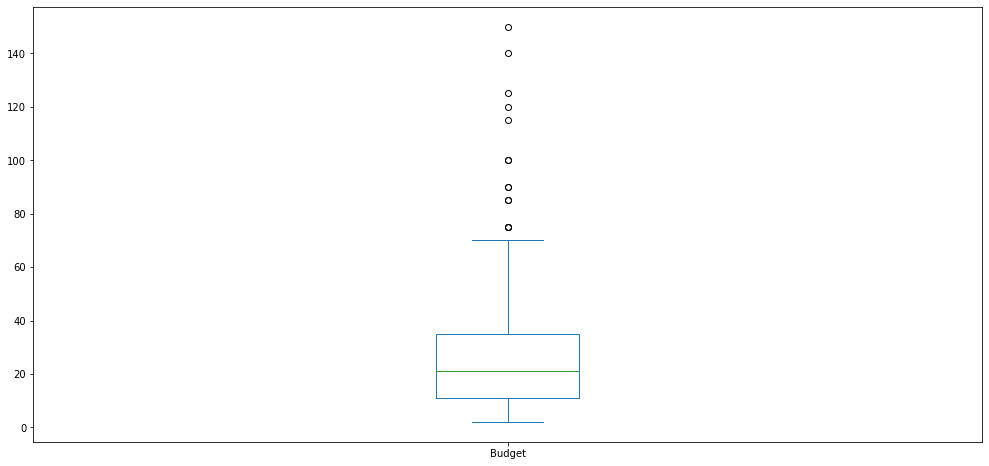

In [19]:
df['Budget'].plot(kind='box')

In [21]:
df.kurt()

C:\Users\ANUPAM~1\AppData\Local\Temp/ipykernel_13284/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


SlNo                   -1.200000
Budget                  4.605858
BoxOfficeCollection    20.549134
YoutubeViews            9.937728
YoutubeLikes           24.857818
YoutubeDislikes        14.740560
dtype: float64

In [ ]:
# from density plots, histgrams, kurtosis and skewness metric- numeric data columns turn out to be positive skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">2.Exploratory Data Analysis
    
    
    A. How many movies got released in each genre? Which genre had the highest number of release?
    B. Which Month of the year maximum number of movie releases are seen?
    C. Can we find out correlation in some of the variables?
    D. Which genre of movies typically sees more You Tube Likes?

In [7]:
df.Genre.unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [24]:
df['Genre']= df['Genre'].str.replace('Action ','Action')

In [25]:
df['Genre']= df['Genre'].str.replace('Thriller ','Thriller')

In [10]:
df['Genre']= df['Genre'].replace({'Thriller ': 'Thriller','Action ': 'Action'}, regex=True)

In [11]:
df['Genre'].value_counts()

Comedy      36
 Drama      35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [12]:
df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [16]:
#b. 
df['Month_Name']= pd.to_datetime(df['Release Date']).dt.month_name()
df['Year']= pd.to_datetime(df['Release Date']).dt.year

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
 10  Month_Name           149 non-null    object        
 11  Year                 149 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 14.1+ KB


In [18]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month_Name,Year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,April,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,January,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,July,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,January,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,July,2014


In [20]:
df_numeric= df.select_dtypes(include= np.number)

In [23]:
df_numeric.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.132755
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.062069
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.011673
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.280666
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.209155
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.147098
Year,0.132755,0.062069,0.011673,0.280666,0.209155,0.147098,1.000000


<AxesSubplot:>

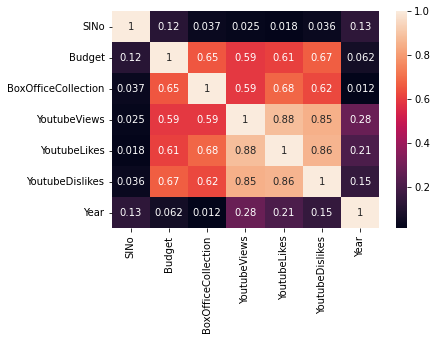

In [24]:
sns.heatmap(df_numeric.corr(), annot=True)

In [ ]:
#correlation - strong positively correlation is seen for Youtube Views, Youtube Likes and Youtube Dislikes.
# strong correlation is seen with values +/- 0.7 and above
# moderate correlation is seen with values +/- 0.4- 0.6,0.69
# rest is weak correlation

In [26]:
#c.
df.groupby('Genre')['YoutubeLikes'].max().sort_values(ascending=False)

Genre
Action      101275
 Drama       43767
Romance      26622
Comedy       20472
Thriller     18907
Name: YoutubeLikes, dtype: int64

In [28]:
df.groupby('Genre')['YoutubeLikes'].sum().sort_values(ascending=False)

Genre
Action      401873
 Drama      279077
Romance     177241
Comedy      172250
Thriller    143312
Name: YoutubeLikes, dtype: int64

In [29]:
df.groupby('Genre')['YoutubeLikes'].mean().sort_values(ascending=False)

Genre
Action      16744.708333
 Drama       7973.628571
Romance      7089.640000
Thriller     4941.793103
Comedy       4784.722222
Name: YoutubeLikes, dtype: float64

In [ ]:
# Data Tranformations

In [30]:
df.skew()

C:\Users\ANUPAM~1\AppData\Local\Temp/ipykernel_16700/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SlNo                   0.000000
Budget                 2.059560
BoxOfficeCollection    3.980880
YoutubeViews           2.667002
YoutubeLikes           4.391138
YoutubeDislikes        3.534963
Year                   0.479715
dtype: float64

In [31]:
trans_df= pd.DataFrame(df['YoutubeLikes'].copy(deep=True))

In [32]:
trans_df.columns

Index(['YoutubeLikes'], dtype='object')

In [34]:
from scipy import stats

In [37]:
trans_df['log_YoutubeLikes']=np.log(trans_df['YoutubeLikes']) #log tansformation
trans_df['sqrt_YoutubeLikes']=np.sqrt(trans_df['YoutubeLikes']) #sqrt
trans_df['cube_YoutubeLikes']=np.cbrt(trans_df['YoutubeLikes']) #cube
trans_df['boxcox_YoutubeLikes']=stats.boxcox(trans_df['YoutubeLikes'])[0] #boxcox
trans_df['reci_YoutubeLikes']=1/trans_df['YoutubeLikes'] #reciprocal

In [38]:
trans_df.head()

,YoutubeLikes,log_YoutubeLikes,sqrt_YoutubeLikes,cube_YoutubeLikes,reci_YoutubeLikes,boxcox_YoutubeLikes
0,26622,10.189493,163.162496,29.859342,0.000038,41.380610
1,1129,7.029088,33.600595,10.412731,0.000886,17.667178
2,586,6.373320,24.207437,8.368209,0.001706,14.570266
3,86,4.454347,9.273618,4.414005,0.011628,7.794482
4,4512,8.414496,67.171422,16.524298,0.000222,25.981232


In [39]:
trans_df.skew()

YoutubeLikes           4.391138
log_YoutubeLikes      -1.826443
sqrt_YoutubeLikes      1.587037
cube_YoutubeLikes      0.633136
reci_YoutubeLikes      5.850591
boxcox_YoutubeLikes    0.009461
dtype: float64

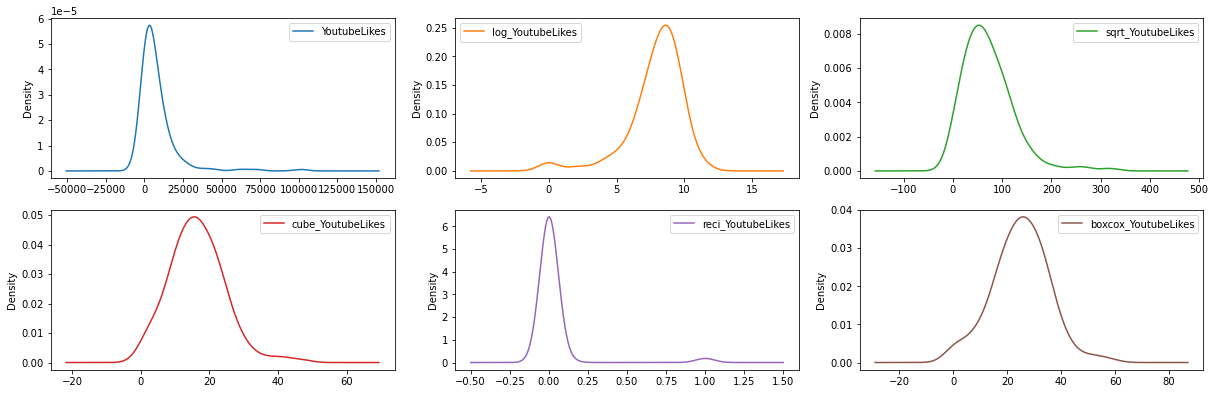

In [40]:
plt.rcParams["figure.figsize"]=[17,8]
trans_df.plot(kind='density',subplots= True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

In [ ]:
# One Hot Encoder, Label Encoder, Ordinal Encoder

In [41]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [73]:
# one hot encoder

encode= OneHotEncoder()

encode_df= pd.DataFrame(encode.fit_transform(df[['Genre']]).toarray(), columns=['Genre_Action',
                                                                                'Genre_Comedy','Genre_Drama',
                                                                                'Genre_Romance','Genre_Thriller'])
                                                                   

encode_df=pd.concat([trans_df,encode_df], axis=1)

encode_df.head()

,YoutubeLikes,log_YoutubeLikes,sqrt_YoutubeLikes,cube_YoutubeLikes,reci_YoutubeLikes,boxcox_YoutubeLikes,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Romance,Genre_Thriller
0,26622,10.189493,163.162496,29.859342,0.000038,41.380610,0.0,0.0,0.0,1.0,0.0
1,1129,7.029088,33.600595,10.412731,0.000886,17.667178,0.0,0.0,0.0,0.0,1.0
2,586,6.373320,24.207437,8.368209,0.001706,14.570266,0.0,1.0,0.0,0.0,0.0
3,86,4.454347,9.273618,4.414005,0.011628,7.794482,0.0,0.0,1.0,0.0,0.0
4,4512,8.414496,67.171422,16.524298,0.000222,25.981232,0.0,1.0,0.0,0.0,0.0


In [74]:
encode_df.describe()

,YoutubeLikes,log_YoutubeLikes,sqrt_YoutubeLikes,cube_YoutubeLikes,reci_YoutubeLikes,boxcox_YoutubeLikes,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Romance,Genre_Thriller
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,7877.536913,7.877313,72.239902,16.371890,0.029516,24.930743,0.161074,0.241611,0.234899,0.167785,0.194631
std,12748.047191,2.068824,51.738759,8.054542,0.162330,10.538460,0.368839,0.429503,0.425366,0.374936,0.397252
min,1.000000,0.000000,1.000000,1.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1377.000000,7.227662,37.107951,11.125289,0.000110,18.701543,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4111.000000,8.321422,64.117080,16.019507,0.000243,25.335309,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9100.000000,9.116030,95.393920,20.877595,0.000726,31.324600,0.000000,0.000000,0.000000,0.000000,0.000000
max,101275.000000,11.525595,318.237333,46.612323,1.000000,57.946845,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df.Genre.value_counts(normalize=True).sort_values(ascending=False)

Comedy      0.241611
 Drama      0.234899
Thriller    0.194631
Romance     0.167785
Action      0.161074
Name: Genre, dtype: float64

In [49]:
df_dummy= pd.get_dummies(df,columns=['Genre'], drop_first=True) #using Pandas  N-1Dummy coding when we have to deal to multi-collinearity

In [50]:
df_dummy.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,Genre_ Drama,Genre_Action,Genre_Comedy,Genre_Romance,Genre_Thriller
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792,2013.630872,0.234899,0.161074,0.241611,0.167785,0.194631
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938,0.629768,0.425366,0.368839,0.429503,0.374936,0.397252
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.ReleaseTime.unique() # ordinal way

array(['LW', 'N', 'HS', 'FS'], dtype=object)

In [58]:
# FS, HS, LW, N- 

orderEncode= OrdinalEncoder(categories= [["FS","HS","LW","N"]])

df['ordered_ReleaseTime']=orderEncode.fit_transform(df['ReleaseTime'].values.reshape(-1,1))

df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month_Name,Year,ordered_ReleaseTime
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,April,2014,2.0
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,January,2013,3.0
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,July,2014,3.0
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,January,2013,3.0
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,July,2014,3.0
5,6,2014-05-30,Citylights,HS,Drama,7,35.00,1076591,1806,84,May,2014,1.0
6,7,2014-09-19,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,September,2014,3.0
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647,January,2013,3.0
8,9,2014-01-10,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591,January,2014,2.0
9,10,2013-01-11,Gangoobai,N,Drama,2,0.01,4354,1,1,January,2013,3.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
 10  Month_Name           149 non-null    object        
 11  Year                 149 non-null    int64         
 12  ordered_ReleaseTime  149 non-null    float64       
dtypes: datetime64[ns](1), float64(2), i

In [70]:
df.Genre.unique()

array(['Romance', 'Thriller', 'Comedy', ' Drama ', 'Action'], dtype=object)

In [71]:
df['Genre']= df['Genre'].str.replace(' Drama ','Drama')

In [72]:
#label encoder - genre 
# Action, Comedy, Drama, Romance, Thriller - 0,1,2,3,4

labelencoder= LabelEncoder()

df['label_genre']=labelencoder.fit_transform(df['Genre'])

df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month_Name,Year,ordered_ReleaseTime,label_genre
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,April,2014,2.0,3
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,January,2013,3.0,4
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,July,2014,3.0,1
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,January,2013,3.0,2
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,July,2014,3.0,1
